Date:31/05/2023

*The aim of the provided code is to perform an ordinary least squares (OLS) regression analysis to investigate the relationship between various independent variables, including 'age', 'gender', 'education', 'Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional stability', 'Openness', 'Approval', 'Love', 'Achievement', 'Perfectionism', 'Entitlement', 'Omnipotence', and 'Autonomy', with a dependent variable representing different persuasion techniques.



*The OLS regression will estimate the coefficients for each independent variable, indicating the magnitude and direction of their impact on the dependent variable, i.e., the persuasion techniques.

## Imports

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from getdata import DataSlicer
#from statistics import shapiro_test
from tabulate import tabulate
import scipy.stats as stats
import random
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tabulate import tabulate
import torch

from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




In [8]:
from IPython.display import Audio

# Load your audio data (replace this with your audio loading code)
audio_path = r"C:\phaseII\beep-06.mp3"  # Provide the correct file path
sampling_rate = 44100  # Replace with the appropriate sampling rate

# Create and display the Audio object
audio = Audio(audio_path, autoplay=True)

### Reads dataset

In [9]:
# Create an instance of the DataSlicer class
data_path = r"C:\phaseII\static\dataset-individual-Items.csv"
data_path1 = r"C:\phaseII\static\reversed-scored-dataset.csv"
data_slicer = DataSlicer(data_path)
data_slicer1 = DataSlicer(data_path1)
 # Call the functions on the data_slicer instance
df = data_slicer.read_data()
df1 = data_slicer1.read_data()

df_avg = data_slicer.average_scores()

features = df1[['age', 'gender', 'education', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Emotional stability', 'Openness', 'Approval',
       'Love', 'Achievement', 'Perfectionism', 'Entitlement', 'Omnipotence',
       'Autonomy']]
techniques = df_avg[['Social proof', 'Flattery', 'Rht_Question', 'Antanagoge', 'Logic',
       'Authority', 'Pathos', 'Repetition', 'Framing', 'Anaphora']]
# This dataframe contains the avegarge acroos the three persuasion goals
#and the sumarized items TIPI and DAS
combined_df = pd.concat([features, techniques], axis=1)

In [10]:
combined_df.tail()

,age,gender,education,Extraversion,Agreeableness,Conscientiousness,Emotional stability,Openness,Approval,Love,...,Social proof,Flattery,Rht_Question,Antanagoge,Logic,Authority,Pathos,Repetition,Framing,Anaphora
1990,4,0,6,3,3,6,2,6,-1,-3,...,3.000000,7.000000,3.000000,6.000000,3.000000,9.666667,7.666667,3.333333,6.666667,6.666667
1991,4,0,6,4,2,5,5,5,6,6,...,4.666667,8.000000,5.333333,1.333333,2.333333,8.333333,6.333333,4.666667,7.666667,7.666667
1992,4,0,3,1,4,1,6,3,-3,-3,...,5.333333,6.000000,6.666667,6.333333,5.666667,6.333333,5.333333,4.666667,5.666667,5.666667
1993,2,0,5,2,2,5,2,4,-3,-1,...,6.333333,8.333333,6.666667,5.666667,6.333333,9.333333,6.666667,6.333333,6.333333,8.333333
1994,0,0,6,2,3,5,2,7,4,10,...,4.333333,4.000000,4.666667,5.666667,6.666667,5.333333,4.666667,5.666667,5.000000,5.333333


### Shuffle the DataFrame

In [16]:
# Set the random seed
random_seed = 42
random.seed(random_seed)
# Shuffle the DataFrame
combined_df = combined_df.sample(frac=1, random_state=random_seed).reset_index(drop=True)

x = features[['age', 'gender', 'education', 'Extraversion', 'Agreeableness',
              'Conscientiousness', 'Emotional stability', 'Openness',
              'Approval', 'Love', 'Achievement', 'Perfectionism',
              'Entitlement', 'Omnipotence', 'Autonomy']]

* Research Question: How are the values of DAS( Approval, Love, Achievement, Entitlement, Perfectionism, Omnipotence and Autonomy) related to individual susceptibility of persuasion techniques?

### Regression using statsmodels

In [13]:
def analyze_regression(x,y):
   

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Fit the multiple linear regression model on the training data
    model = sm.OLS(y_train, sm.add_constant(x_train))
    results = model.fit()

    # Print the regression summary
    print(results.summary())
    print()

    # Calculate the predicted values on the test set
    predicted_values = results.predict(sm.add_constant(x_test))

    
    # Calculate the absolute values of coefficients for ranking
    abs_coefficients = np.abs(results.params[1:])

    # Sort the coefficients in descending order of magnitude
    sorted_coefficients = abs_coefficients.sort_values(ascending=False)

    # Print the sorted coefficients with their names
    print("Sorted Coefficients by Magnitude:")
    print(sorted_coefficients)






In [20]:
def analyze_regression(x, y):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Fit the multiple linear regression model on the training data
    x_train = sm.add_constant(x_train)  # Add a constant term for the intercept
    model = sm.OLS(y_train, x_train)
    results = model.fit()

    # Print the regression summary
    print(results.summary())
    print()

    # Calculate the predicted values on the test set
    x_test = sm.add_constant(x_test)  # Add a constant term for the intercept
    predicted_values = results.predict(x_test)

    # Calculate R-squared for the test set
    r2_test = 1 - (np.sum((y_test - predicted_values) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

    # Get the coefficient for the independent variable of interest (b)
    coefficient_b = results.params['Social proof']  # Replace with the actual variable name

    return r2_test, coefficient_b

# Example usage




In [ ]:
results= analyze_regression(x,y)

### Results: Social Proof

In [21]:

y = combined_df['Social proof']



r2, b = analyze_regression(x, y)


audio



                            OLS Regression Results                            
Dep. Variable:           Social proof   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.170
Date:                Sun, 13 Aug 2023   Prob (F-statistic):              0.289
Time:                        20:03:17   Log-Likelihood:                -2819.5
No. Observations:                1396   AIC:                             5671.
Df Residuals:                    1380   BIC:                             5755.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4014    

KeyError: 'Social proof'

### Results: Authority

                            OLS Regression Results                            
Dep. Variable:              Authority   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     7.063
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           4.28e-15
Time:                        20:50:36   Log-Likelihood:                -2752.4
No. Observations:                1396   AIC:                             5537.
Df Residuals:                    1380   BIC:                             5621.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1050    

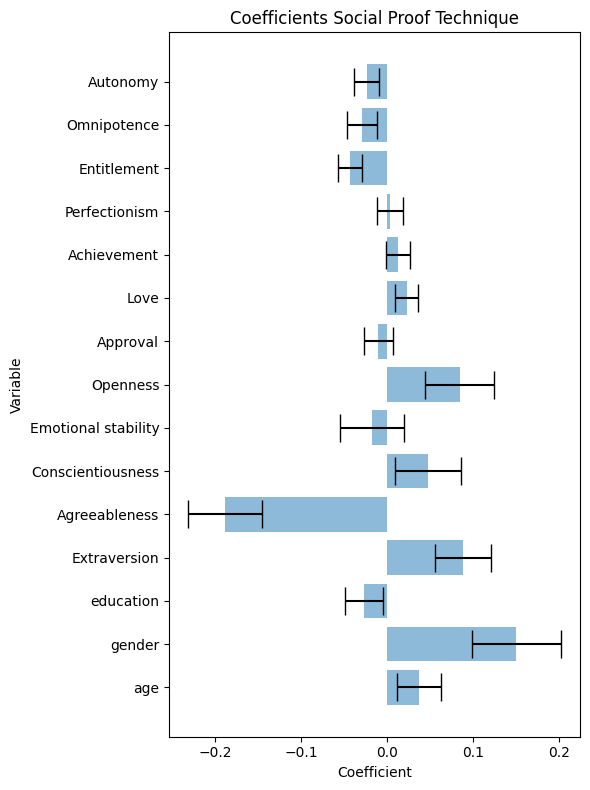

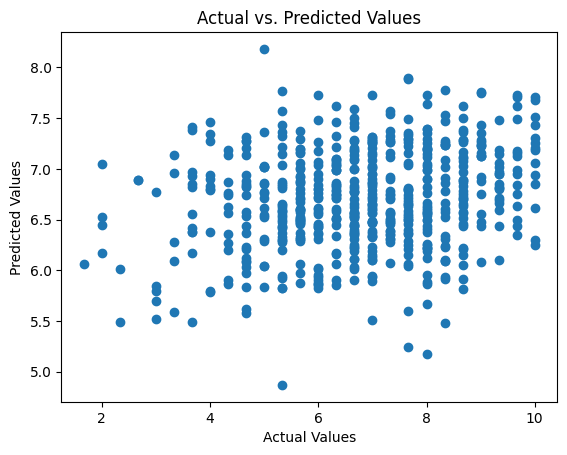

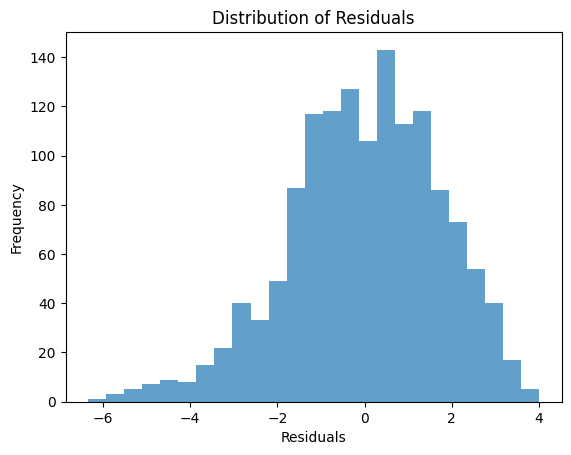

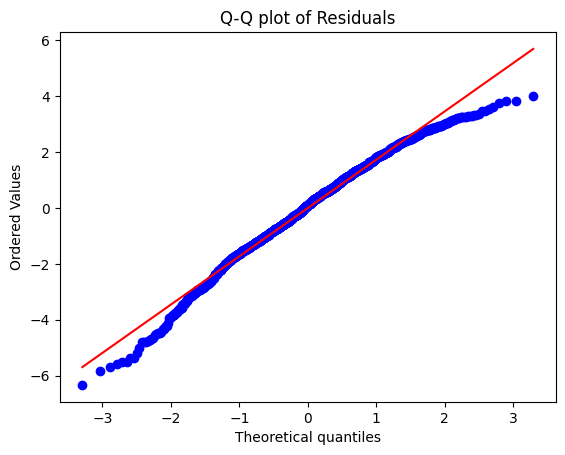

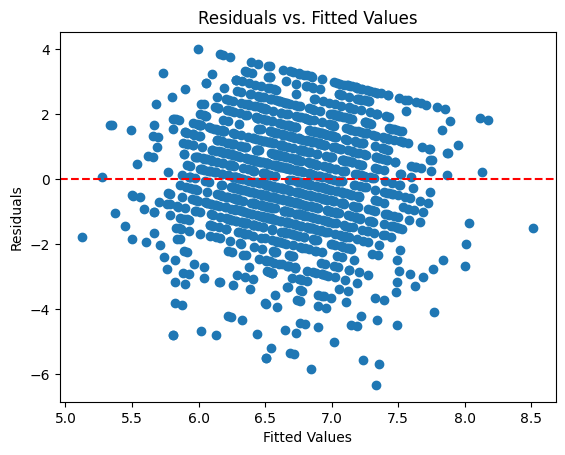

Sorted Coefficients by Magnitude:
Agreeableness          0.188890
gender                 0.150271
Extraversion           0.088360
Openness               0.084172
Conscientiousness      0.047464
Entitlement            0.043240
age                    0.036492
Omnipotence            0.029453
education              0.026969
Autonomy               0.024038
Love                   0.022353
Emotional stability    0.017887
Achievement            0.012144
Approval               0.010278
Perfectionism          0.003331
dtype: float64


In [36]:
#
y = combined_df['s']

results= analyze_regression(x,y)

In [15]:
results

,Authority,PredictedInfluenceScore,Error
0,6.33,6.42,0.09
1,6.67,7.48,0.81
2,8.67,7.41,1.26
3,8.00,7.31,0.69
4,8.33,6.14,2.19
...,...,...,...
1990,5.67,6.71,1.04
1991,7.33,6.80,0.53
1992,5.33,6.41,1.08
1993,4.00,6.92,2.92


### Results:Framing

                            OLS Regression Results                            
Dep. Variable:                Framing   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     11.27
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           6.87e-27
Time:                        09:49:33   Log-Likelihood:                -3643.9
No. Observations:                1995   AIC:                             7320.
Df Residuals:                    1979   BIC:                             7409.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.2020    

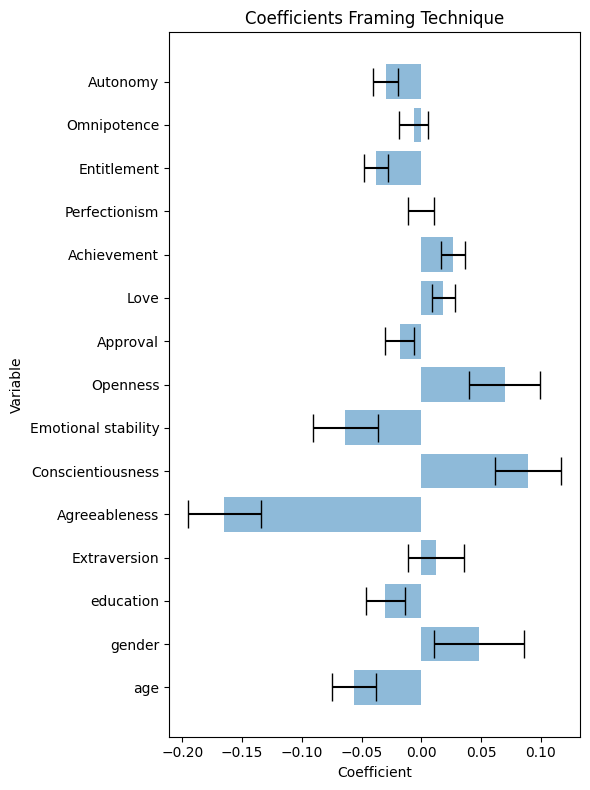

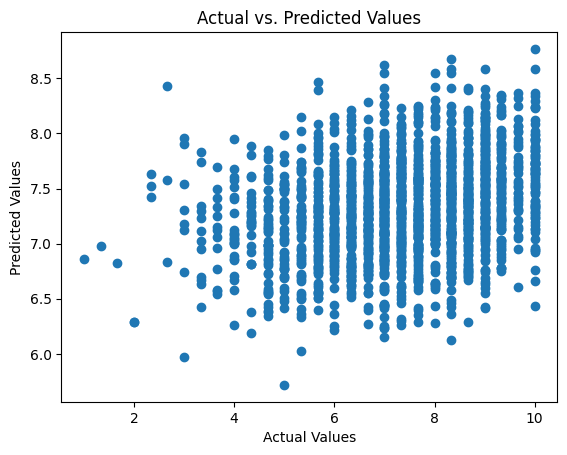

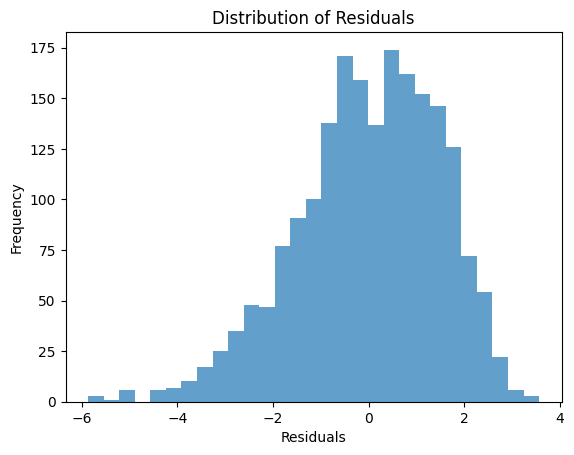

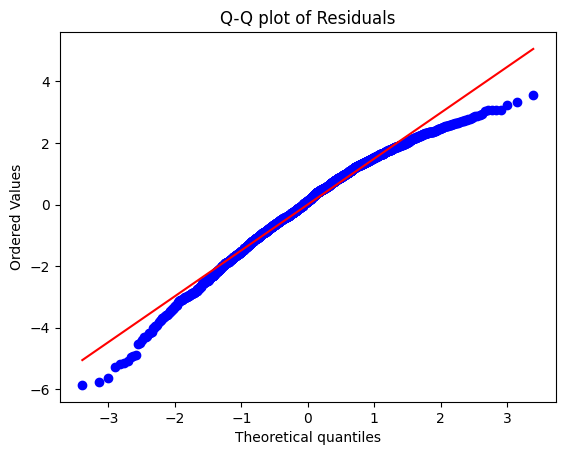

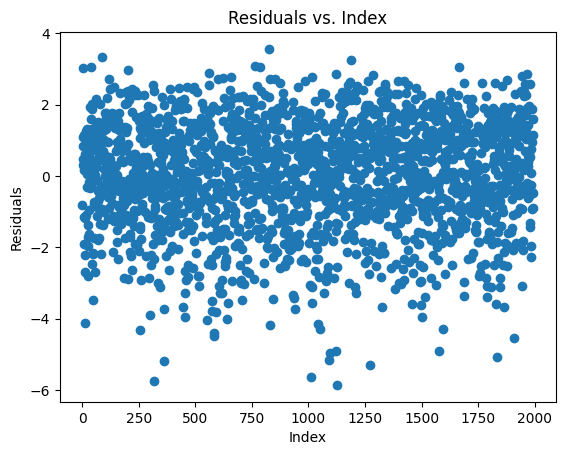

In [12]:
y = combined_df['Framing']

results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

unscaled_y = combined_df['Framing'].values

real_influence_score = combined_df['Framing']
predicted_scores = predicted_values

# results = pd.DataFrame(round(real_influence_score, 2))
# results['PredictedInfluenceScore'] = np.around(predicted_scores, 2)
# results['Error'] = abs(results['Framing'] - results['PredictedInfluenceScore'])
# print(results.head(10))

### Results:Pathos

                            OLS Regression Results                            
Dep. Variable:                 Pathos   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     14.19
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           5.66e-35
Time:                        21:04:08   Log-Likelihood:                -3918.4
No. Observations:                1995   AIC:                             7869.
Df Residuals:                    1979   BIC:                             7958.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.0853    

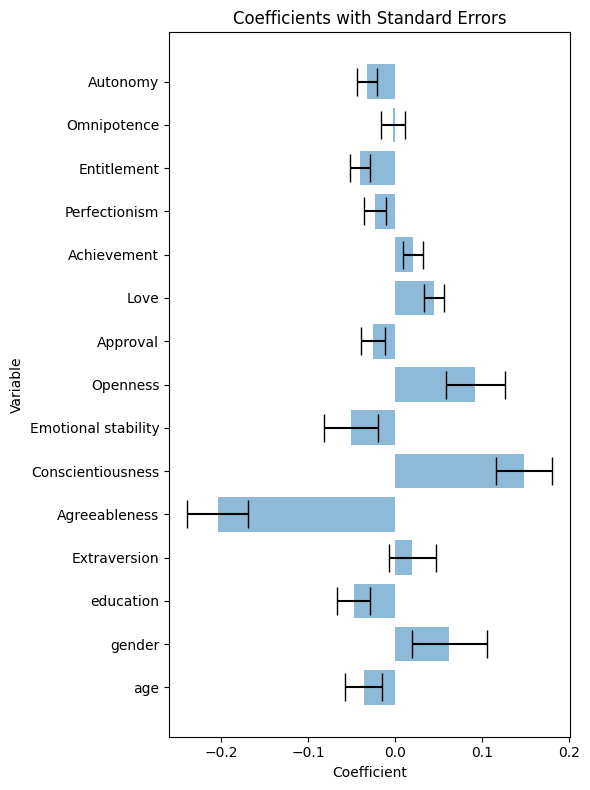

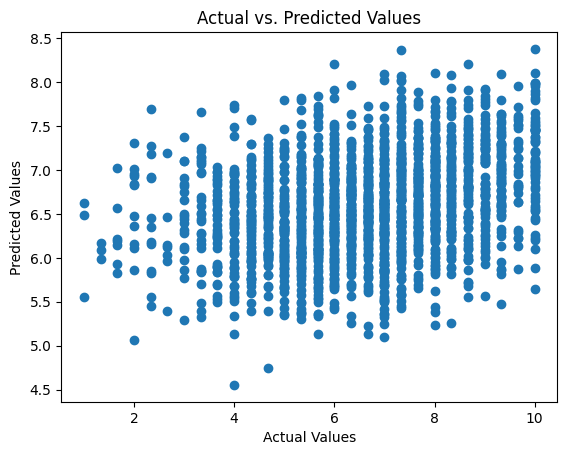

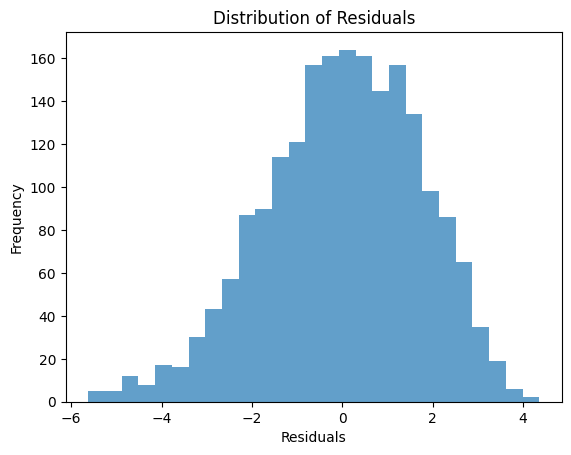

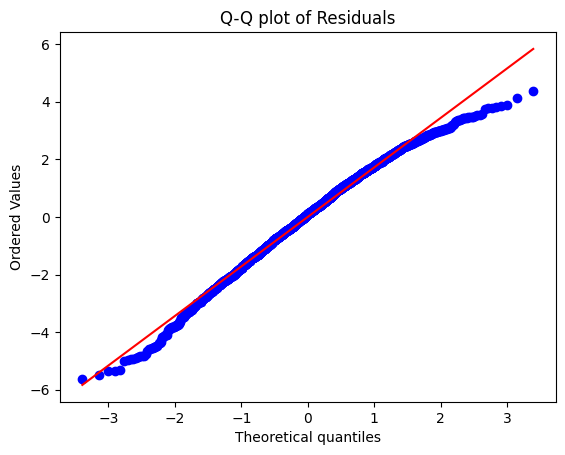

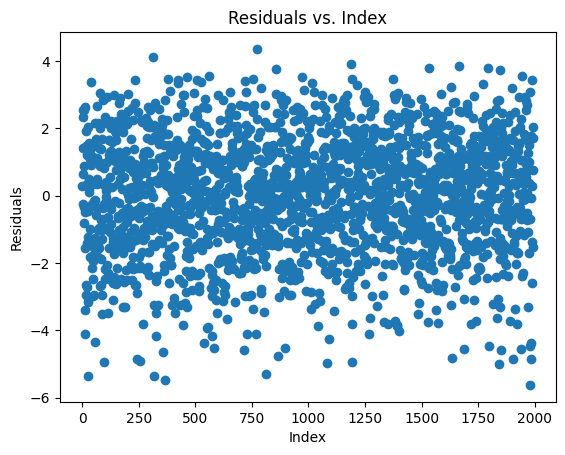

In [12]:
x = combined_df[['age', 'gender', 'education', 'Extraversion', 'Agreeableness',
                 'Conscientiousness', 'Emotional stability', 'Openness',
                 'Approval', 'Love', 'Achievement', 'Perfectionism',
                 'Entitlement', 'Omnipotence', 'Autonomy']]
y = combined_df['Pathos']

results, coefficients, standard_errors, predicted_values = perform_regression(x, y)

# unscaled_y = combined_df['Pathos'].values

# real_influence_score = combined_df['Pathos']
# predicted_scores = predicted_values

# results = pd.DataFrame(round(real_influence_score, 2))
# results['PredictedInfluenceScore'] = np.around(predicted_scores, 2)
# results['Error'] = abs(results['Pathos'] - results['PredictedInfluenceScore'])
# print(results.head(10))

In [ ]:
Predictor	b	B	t-test	p-value	95.0% CI
Lower	Upper b: Unstandardized beta; B: Standardized beta; CI: Confidence Interval.